# Advanced Regression: Lasso and Ridge

## Housing Price Prediction Assignment

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house. Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
data = pd.read_csv("train.csv")
# Let's take a look at the first few rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Summary of the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Getting insights of the features
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Separating the Numerical and Categorical features for analysis
data_numeric = data.select_dtypes(include = ['int64', 'float64'])
data_categorical = data.select_dtypes(include = ['object'])

In [6]:
# Numerical features in the dataframe
data_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### 2. Data Visualization & Data Preparation

#### Analyzing Numerical Data

#### Outlier Detection


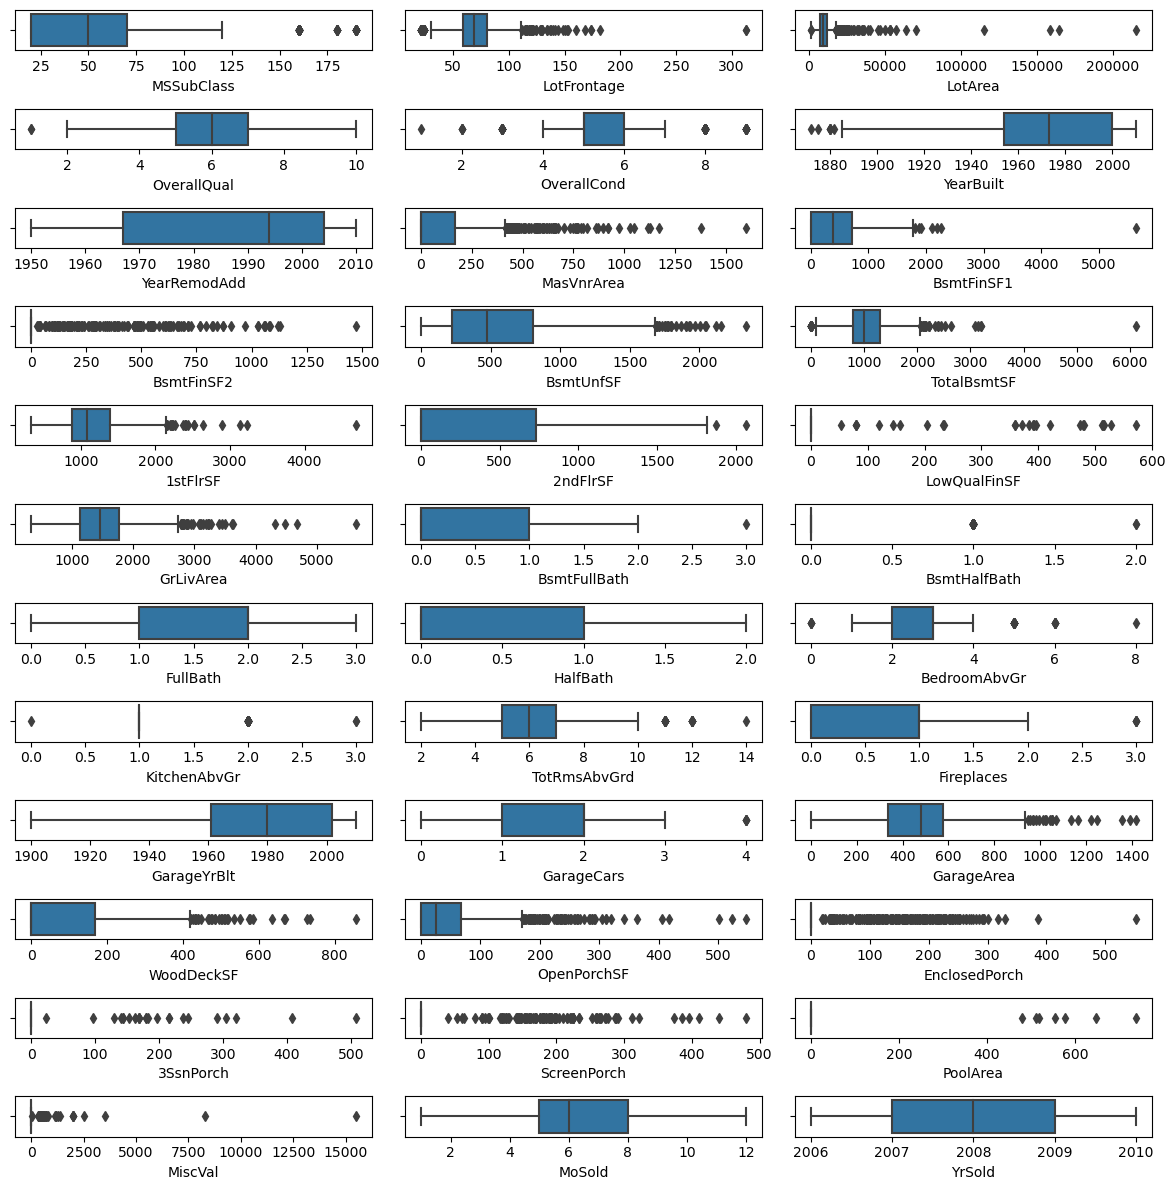

In [7]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']):
    plt.subplot(12, 3, i+1)
    plt.subplots_adjust(hspace = 6.0, wspace = 4.0)
    sns.boxplot(data[feature])
    plt.tight_layout()

#### Insights:
- Majority of the numeric features have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' will excluded

#### Checking percentage of outliers for all the numerical columns.

In [8]:
outliers_percentage = {}
for feature in data_numeric.columns:
    IQR = data_numeric[feature].quantile(.75) - data_numeric[feature].quantile(.25)
    outliers_count = data_numeric[(data_numeric[feature]>(data_numeric[feature].quantile(.75)+1.5*IQR)) | (data_numeric[feature]<(data_numeric[feature].quantile(.25) - 1.5*IQR))].shape[0]
    outliers_percentage[feature] = round(outliers_count/data_numeric.shape[0]*100,2)

data_outlier = pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())}) 
data_outlier.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


In [9]:
for feature, percentage in outliers_percentage.items():
    if feature != 'SalePrice':
        IQR = data[feature].quantile(.75) - data[feature].quantile(.25)
        max_value = data[feature].quantile(.75)+1.5*IQR
        min_value = data[feature].quantile(.25)-1.5*IQR
        data[feature][data[feature] > max_value] = max_value
        data[feature][data[feature] < min_value] = min_value

#### Checking Outliers after removal of outliers

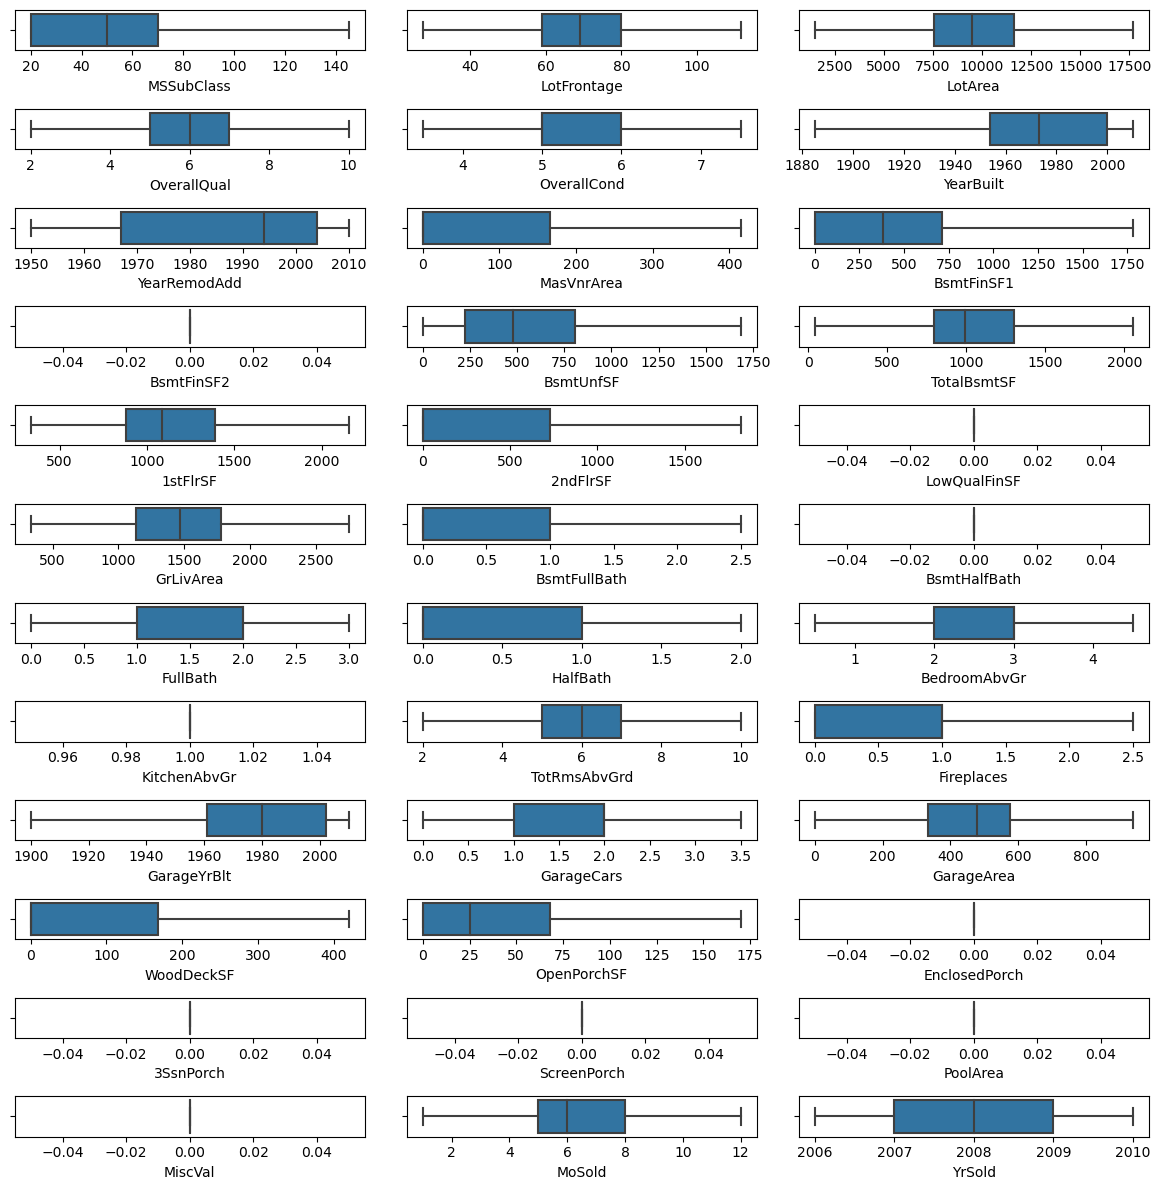

In [10]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']):
    plt.subplot(12, 3, i+1)
    plt.subplots_adjust(hspace = 6.0, wspace = 4.0)
    sns.boxplot(data[feature])
    plt.tight_layout()

As we can see from above plots that we have removed outliers but we haven't actuallly removed outliers but we have just reassigned other values.

In [11]:
# Checking the dataset after reassigning minimum and maximum values
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


#### Correlation in Numeric Data

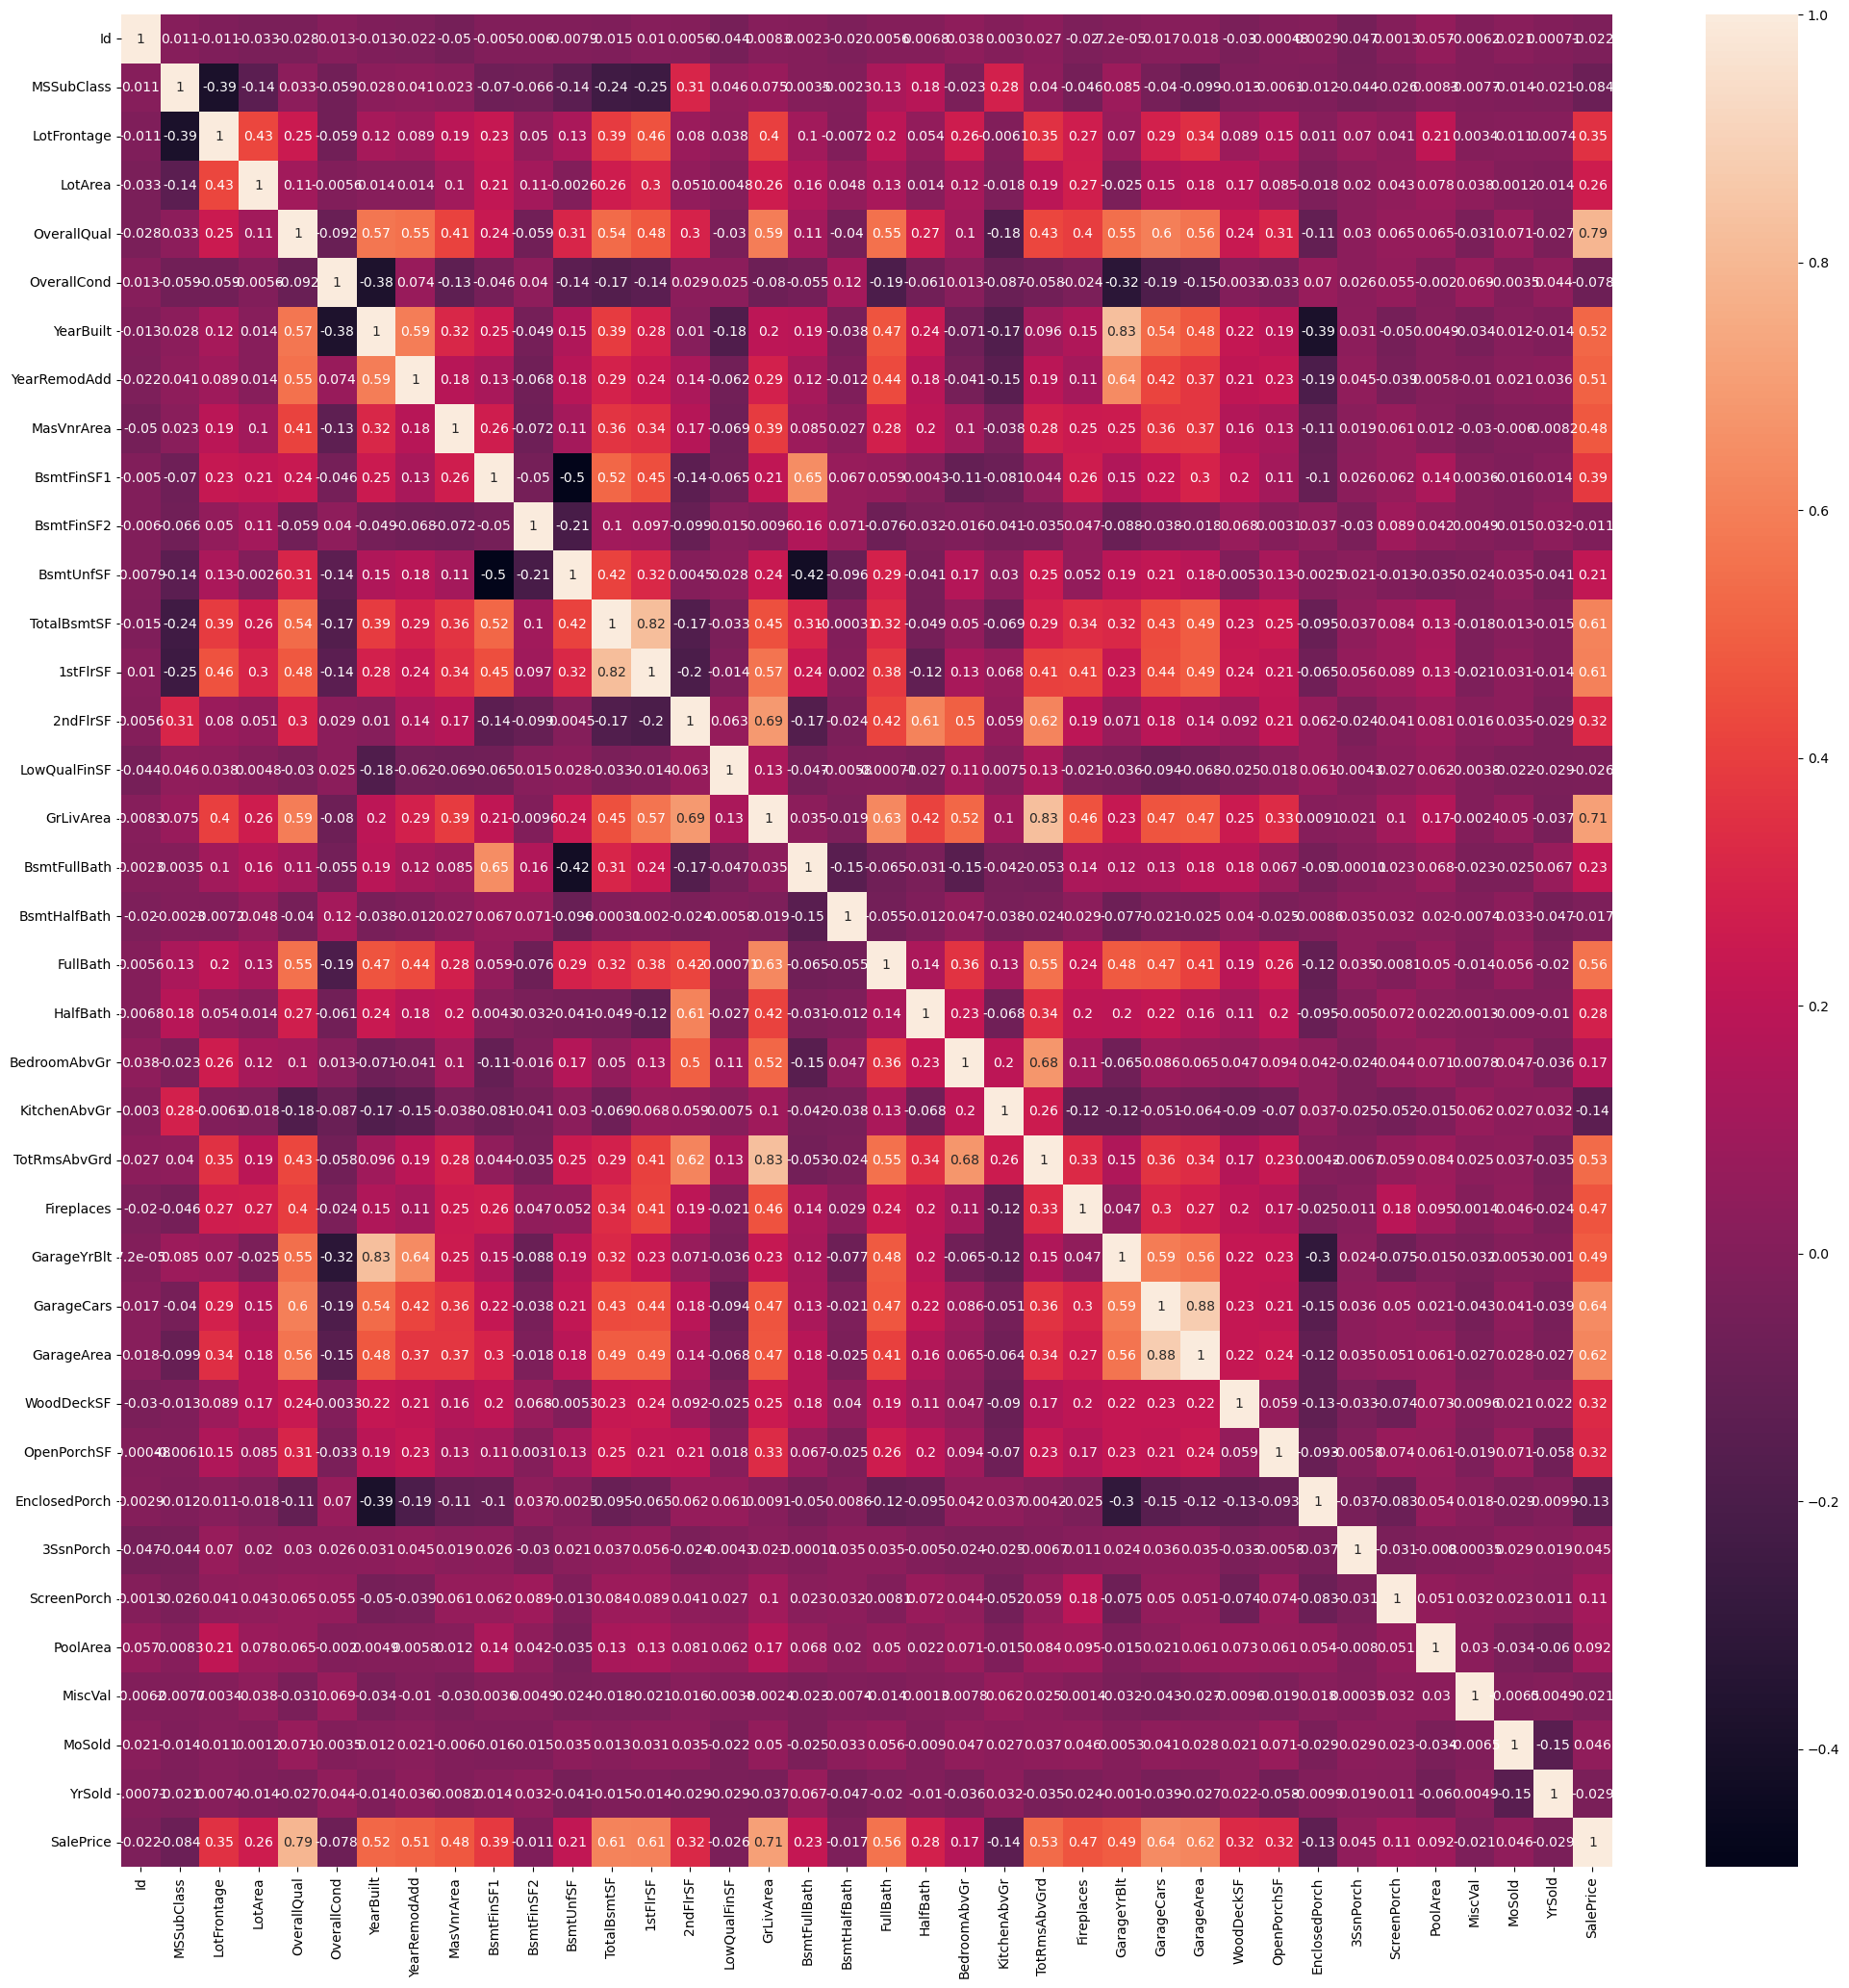

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(data_numeric.corr(), annot=True)
plt.show()

#### Insights:
Some of the features have high correlation with each other
- GarageCars and GarageArea (0.88)
- GarageYrBlt and YearBuilt (0.83)
- TotRmsAbvGrd and GrLivArea (0.83)
- TotalBsmtSF and 1stflrSF (0.82)

One feature from each of these pair will be dropped after data visualization.

#### Univariate and Bivariate Analysis - Numerical Features

##### Analyzing Numerical Features with continuous values

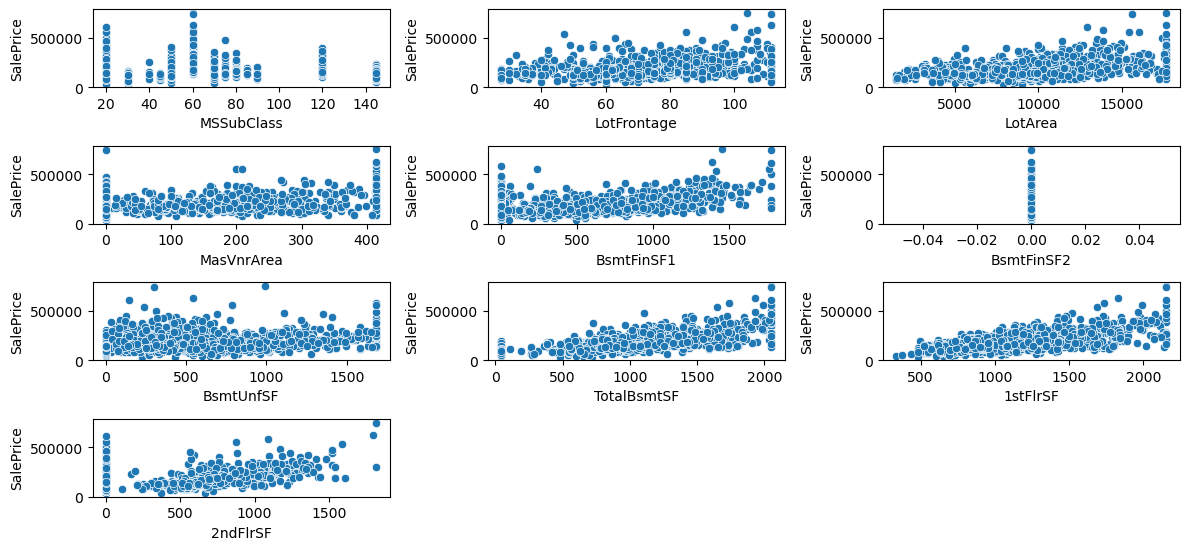

In [13]:
fig = plt.subplots(figsize=(12, 12))
for  i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data[feature],data['SalePrice'])
    plt.tight_layout()

#### Insights:
- Features like LotFrontage, LotArea, TotalBsmtSF, '1stFlrSF','2ndFlrSF' are showing positive correlation with SalePrice
- MSSubClass has discrete values.
- BsmtFinSF2 has single value and can be dropped.

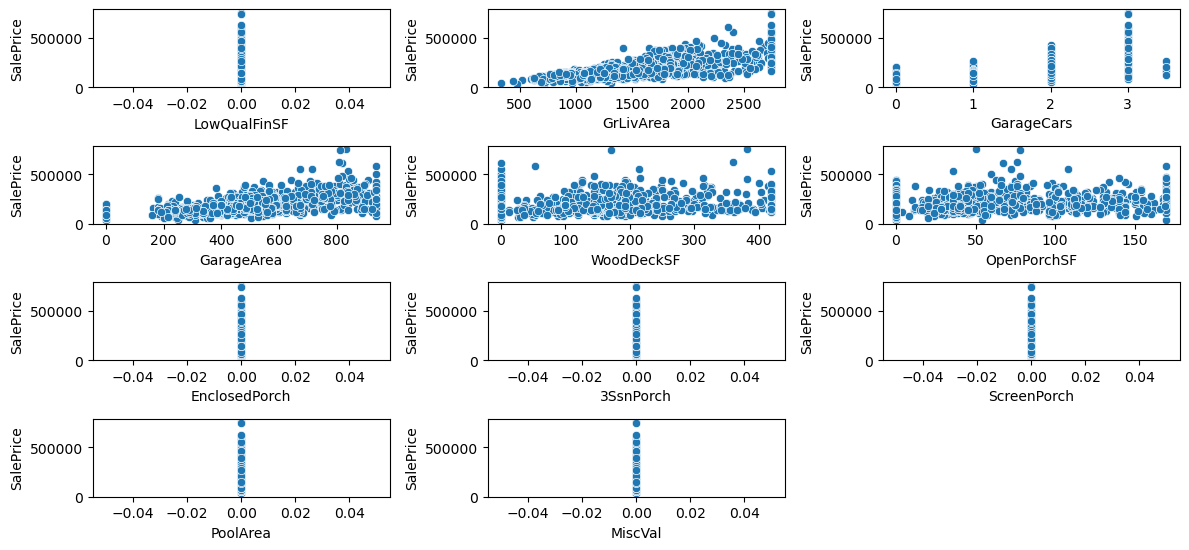

In [14]:
fig = plt.subplots(figsize=(12, 12))
for  i, feature in enumerate(['LowQualFinSF','GrLivArea','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data[feature],data['SalePrice'])
    plt.tight_layout()

#### Insights:
- GrLivArea and GarageArea are showing positive correlation with SalePrice.
- LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal features have single values and can be dropped


#### Visualizing the distribution of the numeric features

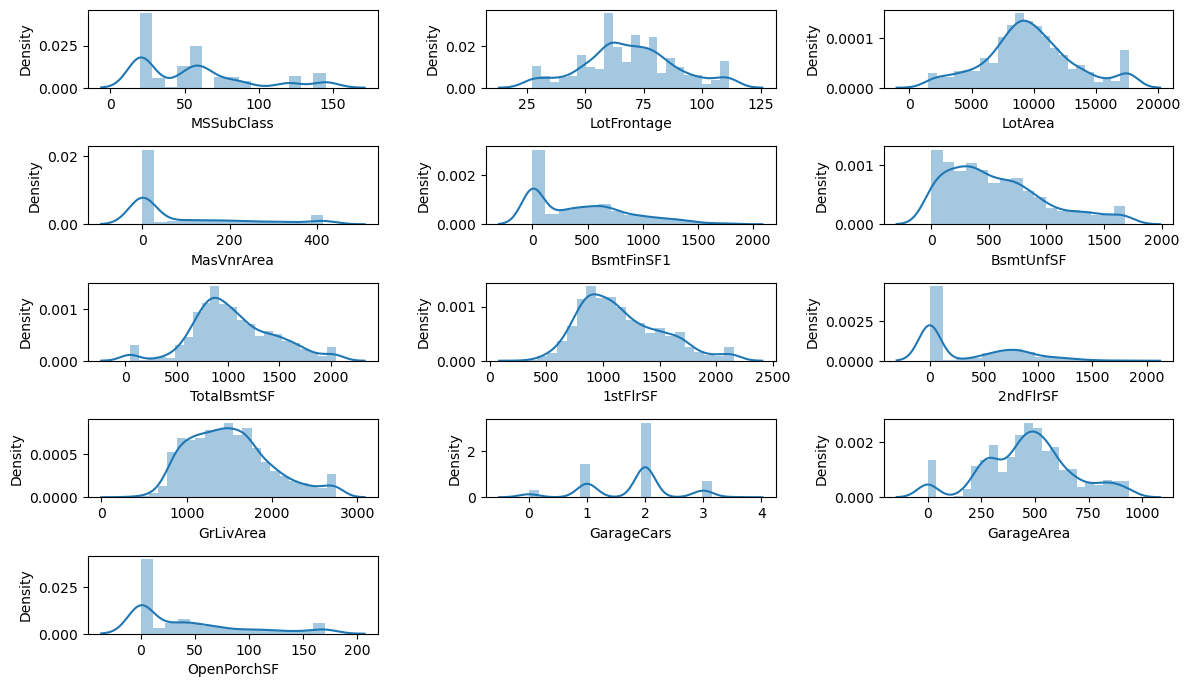

In [15]:
fig = plt.subplots(figsize=(12, 12))
for  i, feature in enumerate(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageCars','GarageArea','OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(data[feature])
    plt.tight_layout()

In [16]:
# As per above Insights, we have removed columns which has single values and does not provide useful information
data.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [17]:
# Checking columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

#### Analyzing Numerical Features with Discrete Values

In [18]:
data[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
     'TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,0,2,1,3.0,1,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,0,2,0,3.0,1,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,0,2,1,3.0,1,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,0,1,0,3.0,1,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,0,2,1,4.0,1,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,0,2,1,3.0,1,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,0,2,0,3.0,1,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,0,2,0,4.0,1,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,0,1,0,2.0,1,5,0.0,1950.0,1950,1996


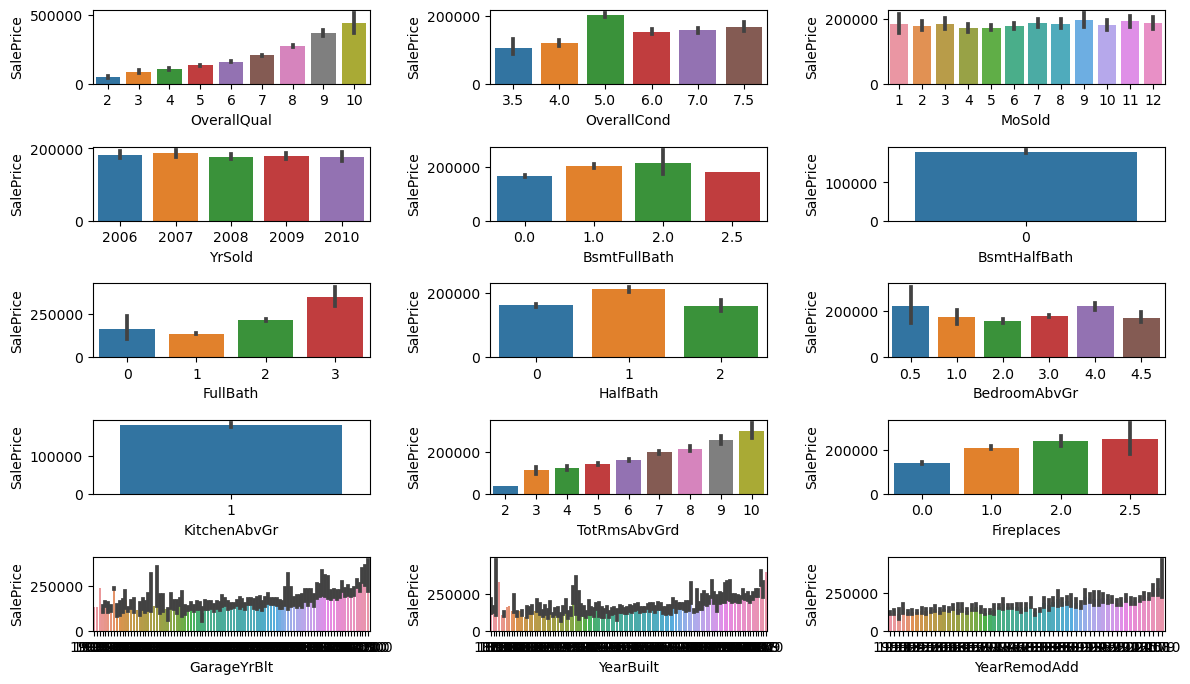

In [19]:
fig = plt.subplots(figsize=(12, 12))
for  i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
     'TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(data[feature], data['SalePrice'])
    plt.tight_layout()

#### Insights:
- 'OverallQual': More the Rating, more the SalePrice
- 'OverallCond': SalePrice is highest for Rating 5
- 'MoSold': SalePrice does not show a strong trend depending on month on which house is sold
- 'YrSold': SalePrice does not show a strong trend depending on year on which house is sold
- 'FullBath': 3 have highest SalePrice
- 'HalfBath': 1 have highest SalePrice
- 'TotRmsAbvGrd': More the number of total rooms above grade more the SalePrice

In [20]:
data[['BsmtFullBath','KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1460.000000,1460.0,1379.000000,1460.000000,1460.000000
mean,0.425000,1.0,1978.506164,1971.299315,1984.865753
std,0.517373,0.0,24.689725,30.108397,20.645407
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1967.000000
50%,0.000000,1.0,1980.000000,1973.000000,1994.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [21]:
print(data['BsmtFullBath'].value_counts())
print(data['KitchenAbvGr'].value_counts())

0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64
1    1460
Name: KitchenAbvGr, dtype: int64


In [22]:
# Dropping 'KitchenAbvGr' for not having useful information
data.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [23]:
data[['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.299315,1984.865753,2007.815753
std,24.689725,30.108397,20.645407,1.328095
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


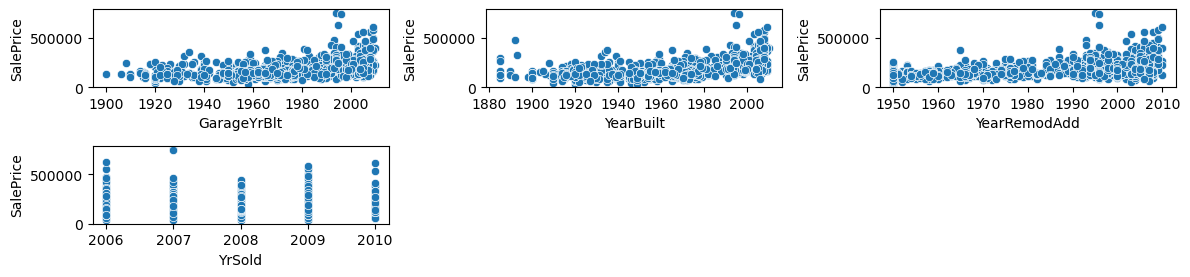

In [24]:
fig = plt.subplots(figsize=(12, 12))
for  i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data[feature], data['SalePrice'])
    plt.tight_layout()

#### Insights:
- Sale Price is more for recently built garages
- Sale Price is more for recently built houses
- Sale Price is more for recently remodelled houses

### Missing value Handling - Numerical Features

In [25]:
for feature in data.select_dtypes(exclude=['object']).columns:
    if data[feature].isnull().any():
        print(feature,' : ', round(data[feature].isnull().sum()/data.shape[0],2)*100)

LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [26]:
# Since, MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not provide usefull information
data = data[~data['MasVnrArea'].isnull()]
data.drop(['Id'], axis=1, inplace=True)
data_numeric.drop(['Id'], axis=1, inplace=True)

In [27]:
# Checking the number of columns
data.shape

(1452, 73)

#### Insights:
- Dropping GarageCars because of correlation with GarageArea
- Dropping GarageYrBlt for high correlation with YearBuilt and containing missing value
- Dropping GrLivArea because of high correlation with TotRmsAbvGrd
- Dropping TotalBsmtSF because of high correlation with 1stflrSF


In [28]:
data.drop(['GarageCars','GarageYrBlt','GrLivArea','TotalBsmtSF'], axis=1, inplace=True)

In [29]:
# Checking the number of columns
data.shape

(1452, 69)

### Analyzing Categorical Features

In [30]:
# Categorical Features in the dataframe
data_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Missing Value Handling - Categorical Feature

In [31]:
for feature in data.select_dtypes(include=['object']).columns:
    if data[feature].isnull().any():
        print(feature,' : ', round(data[feature].isnull().sum()/data.shape[0],2)*100)

Alley  :  94.0
BsmtQual  :  3.0
BsmtCond  :  3.0
BsmtExposure  :  3.0
BsmtFinType1  :  3.0
BsmtFinType2  :  3.0
Electrical  :  0.0
FireplaceQu  :  47.0
GarageType  :  6.0
GarageFinish  :  6.0
GarageQual  :  6.0
GarageCond  :  6.0
PoolQC  :  100.0
Fence  :  81.0
MiscFeature  :  96.0


#### Insights:
- For Alley, NaN means No access to Alley
- For BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 NaN means No basement
- For GarageType,GarageFinish,GarageQual,GarageCond NaN means No Garage
- For FireplaceQu, Fence NaN means No Fire Place and No Fence
- MiscFeature NaN means no additional features are mentioned

In [32]:
# Imputing missing value with "Not Available"
data[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond',
    'FireplaceQu', 'Fence','MiscFeature']] = data[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond',
    'FireplaceQu', 'Fence','MiscFeature']].fillna(value='Not Available', axis=1)

In [33]:
# Checking Null Values Again
data[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond',
    'FireplaceQu', 'Fence','MiscFeature']].isnull().sum()

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64

In [34]:
# Dropping 'PoolQC' for very high percentage of missing value 
data.drop(['PoolQC'], axis=1, inplace=True)
# Dopping rows with null values in Electrical
data.dropna(subset=['Electrical'], inplace=True)

In [35]:
# Checking overall NULL values in given dataset
for feature in data.columns:
    if data[feature].isnull().any():
        print(feature,' : ',round(data[feature].isnull().sum()/data.shape[0],2)*100)

LotFrontage  :  18.0


Missing value imputation will be done after splitting the data into train and test set to avoid data leakage.

In [36]:
data.shape

(1451, 68)

In [37]:
categorical_features = data.select_dtypes(include = ['object'])

In [38]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [39]:
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition']

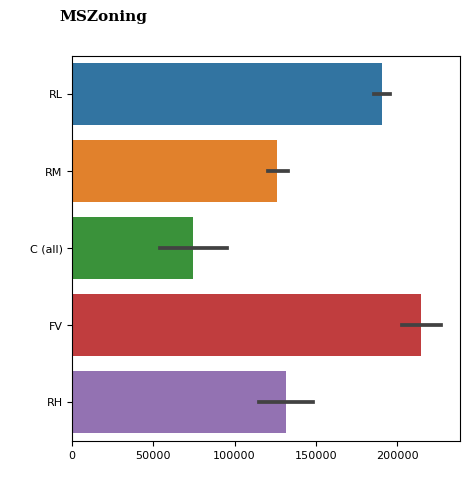

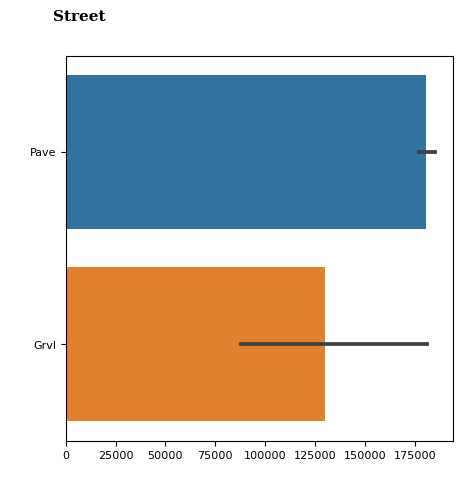

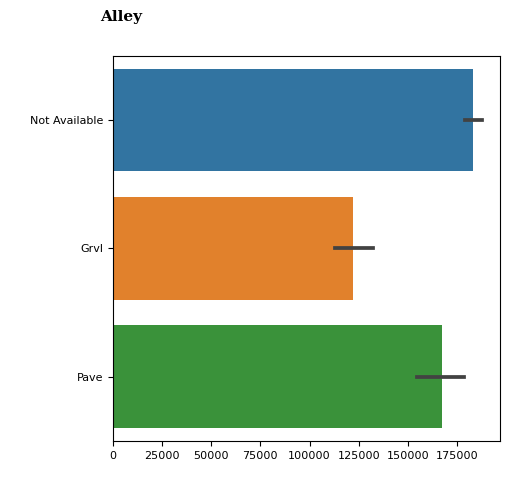

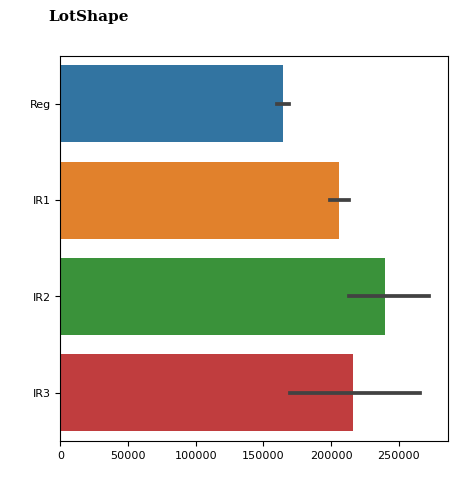

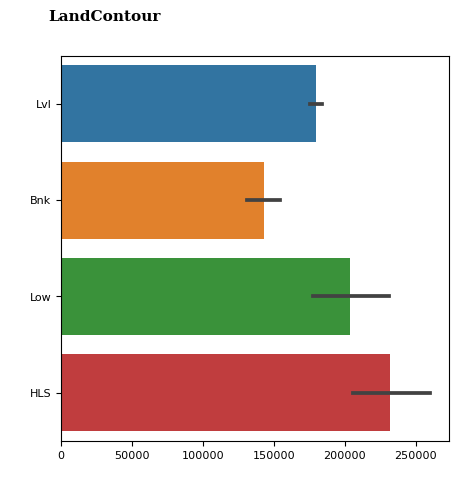

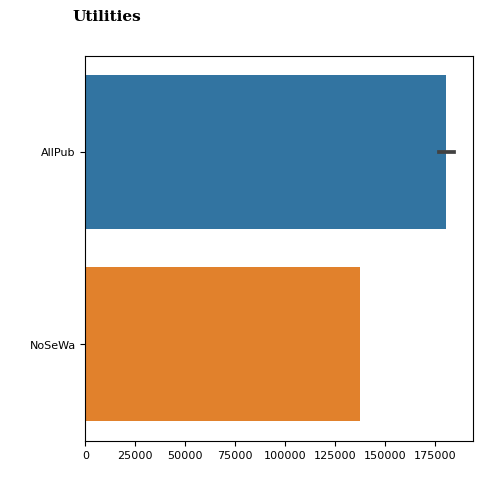

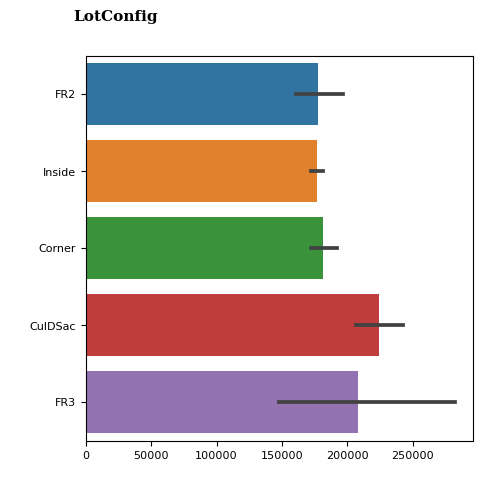

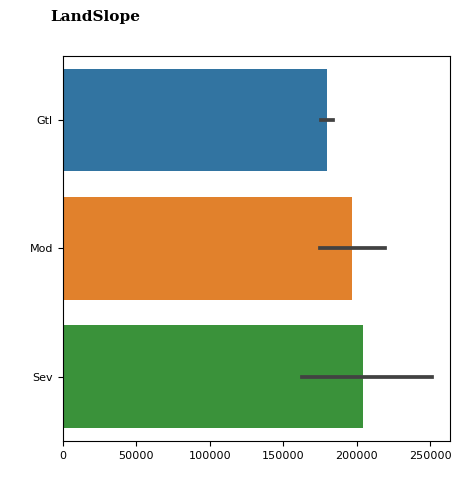

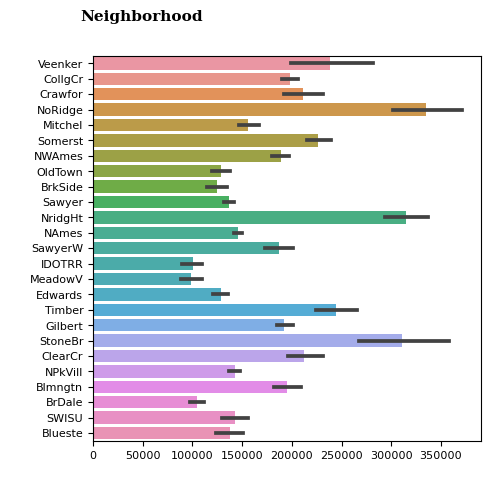

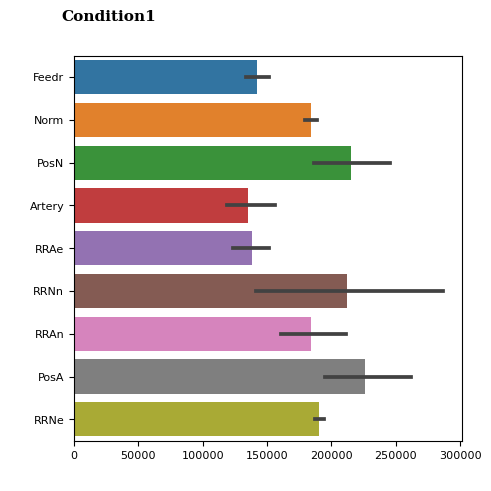

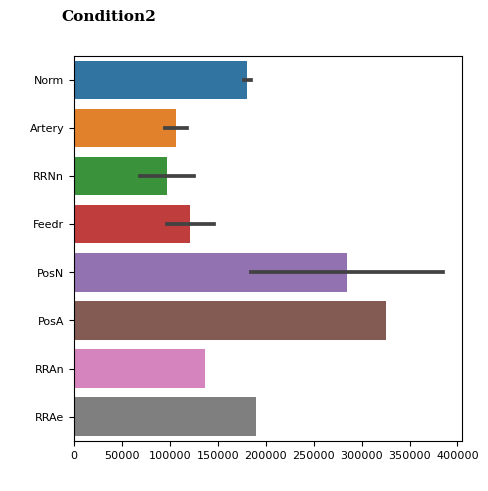

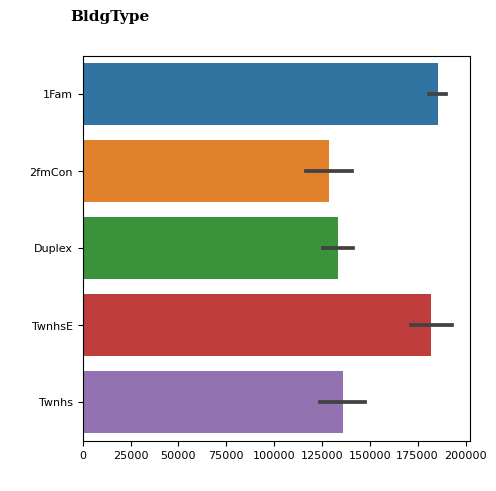

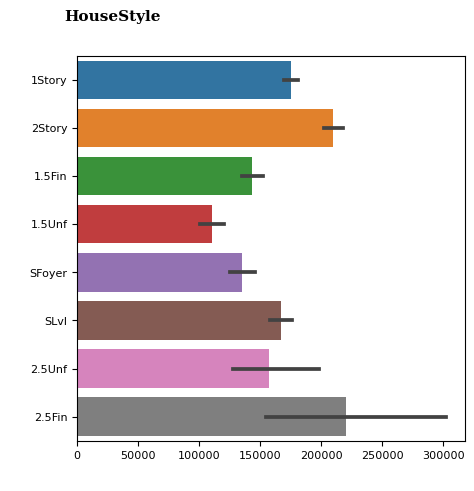

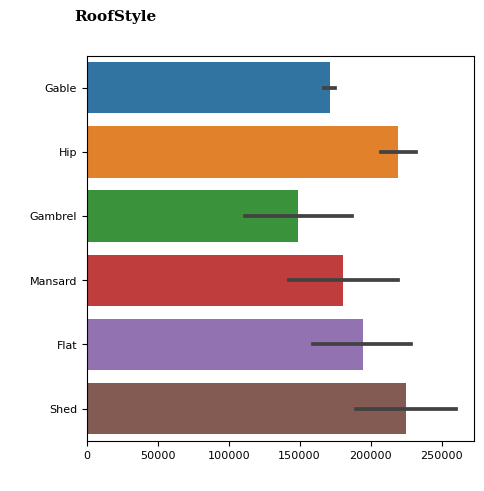

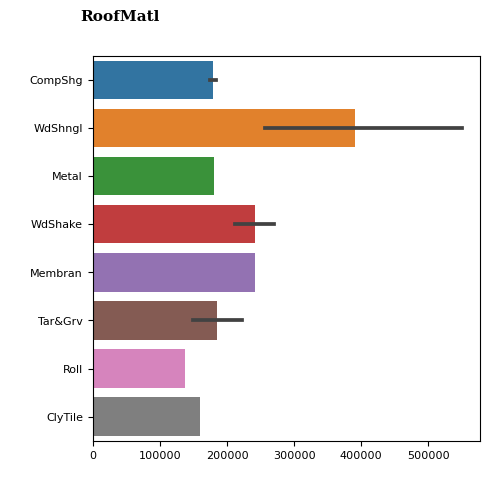

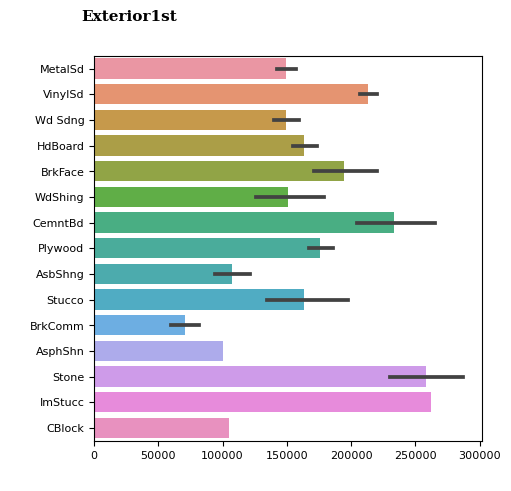

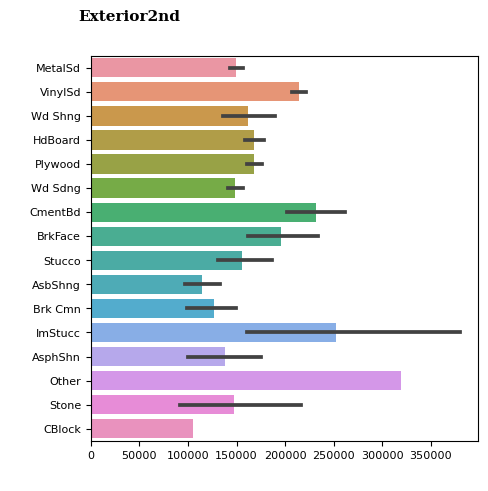

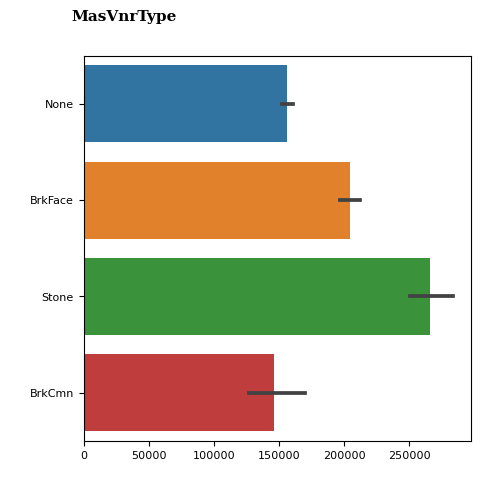

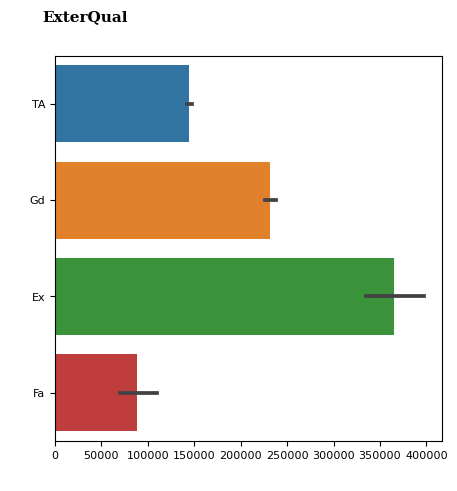

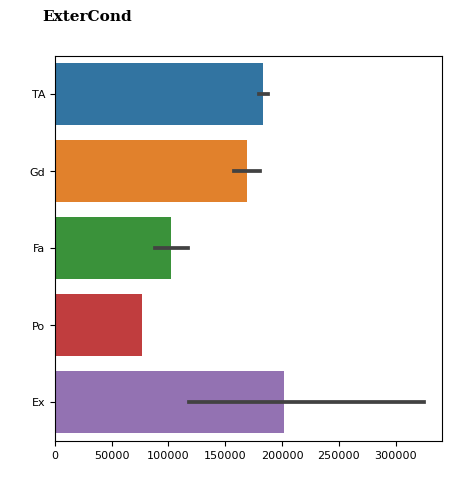

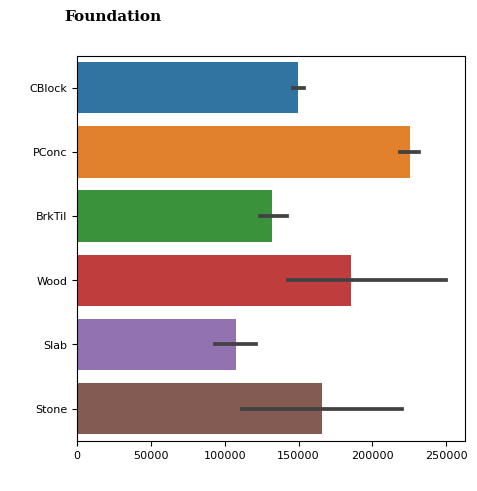

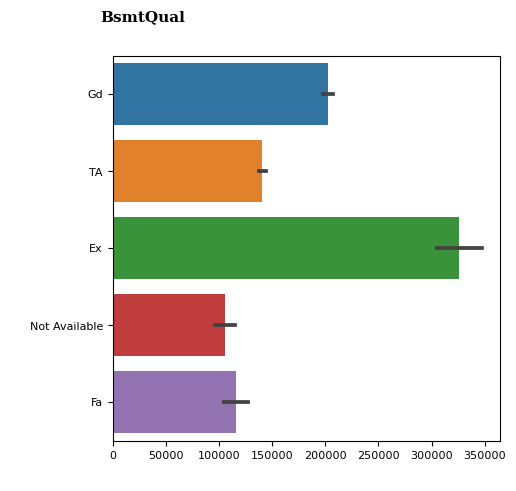

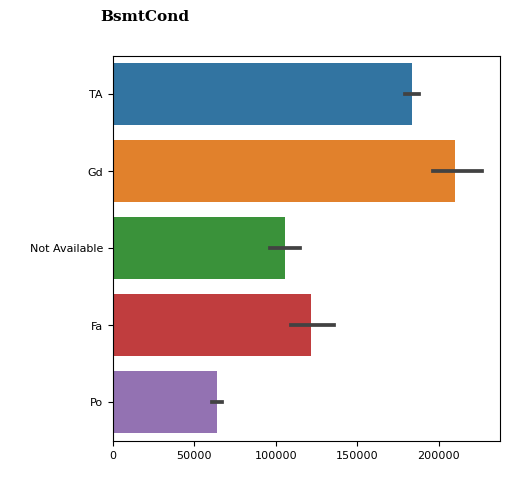

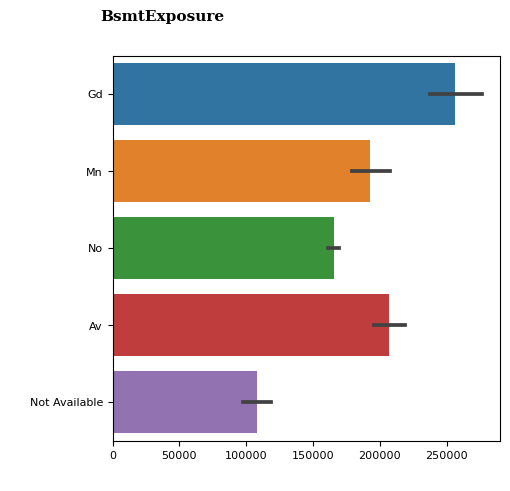

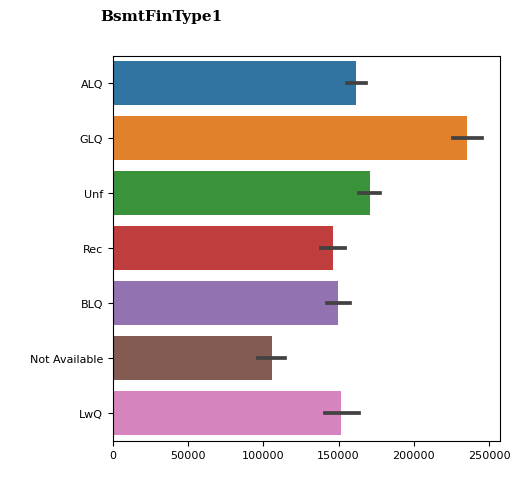

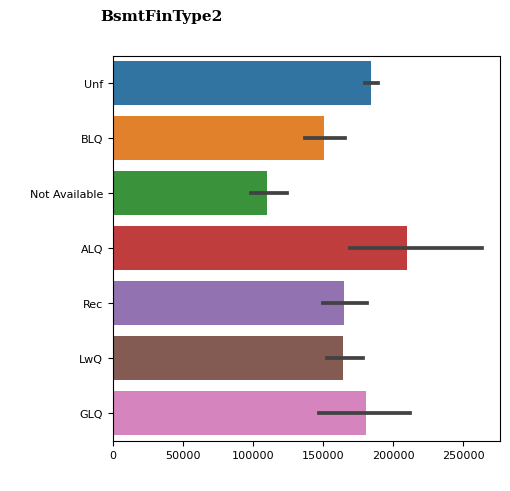

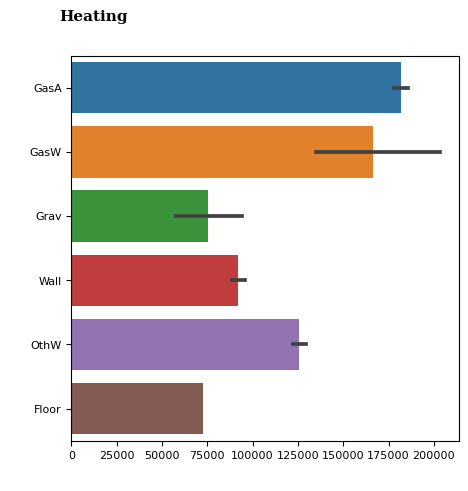

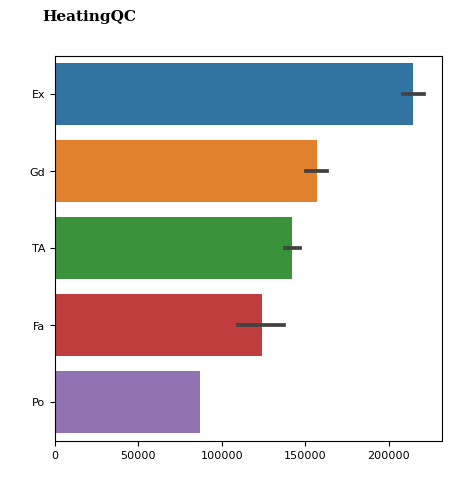

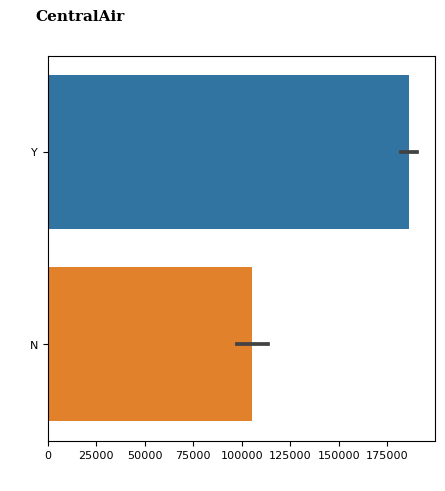

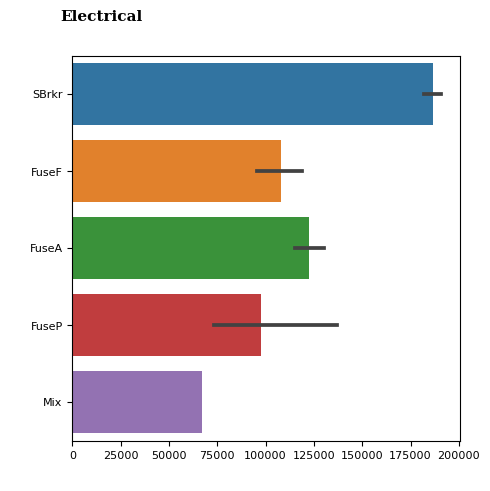

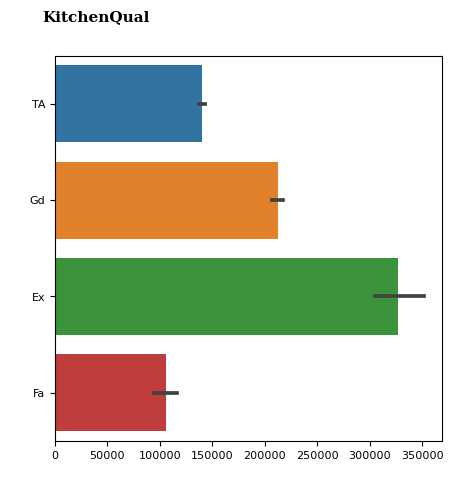

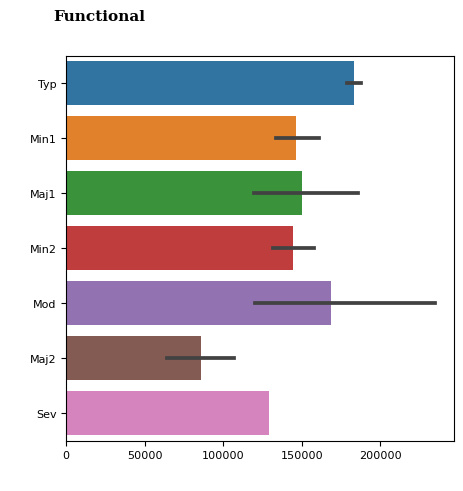

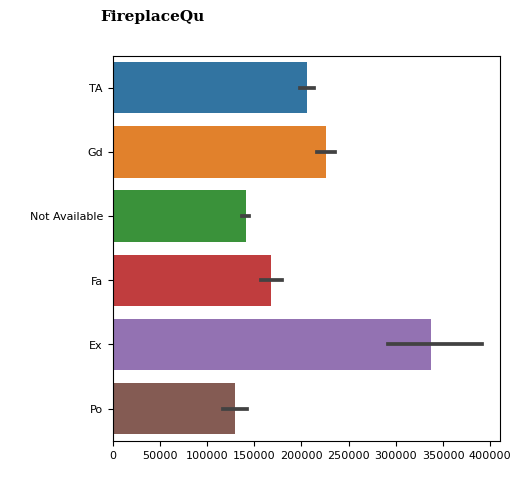

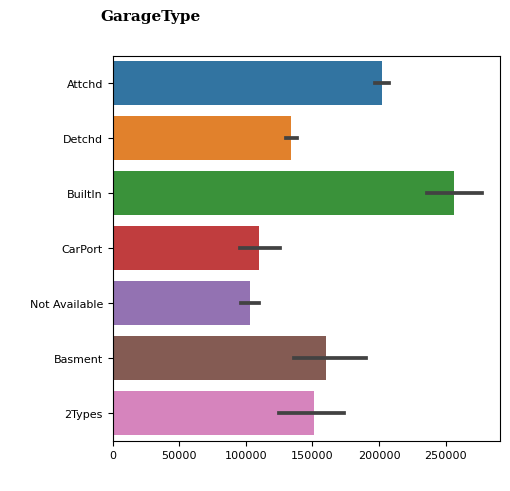

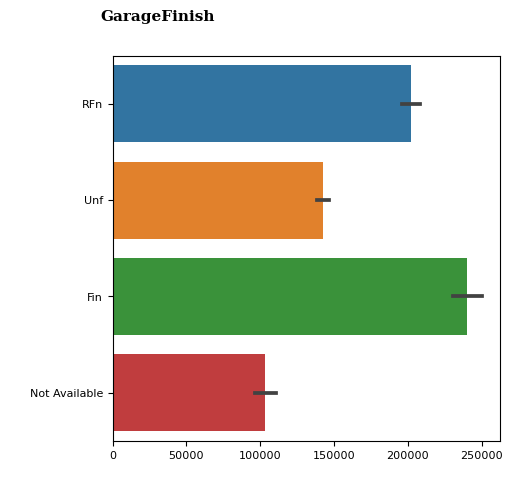

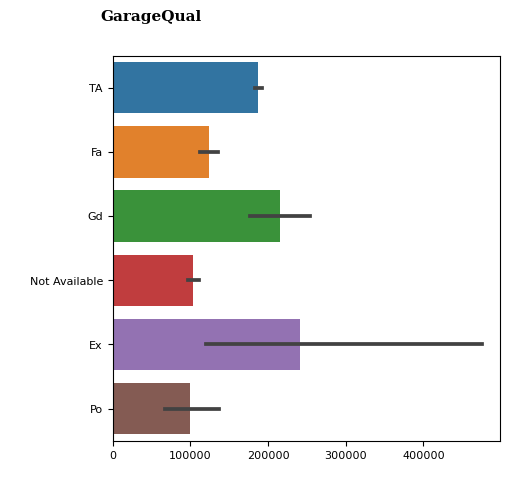

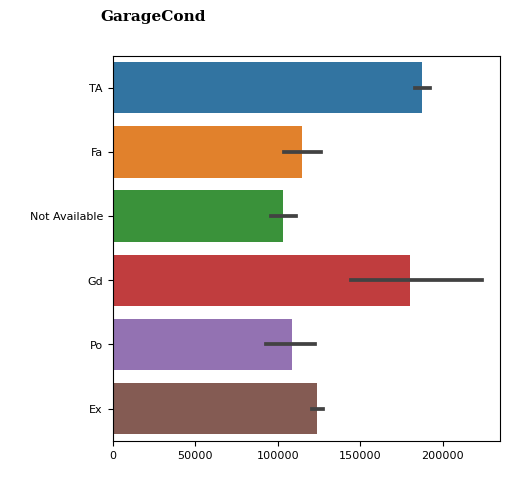

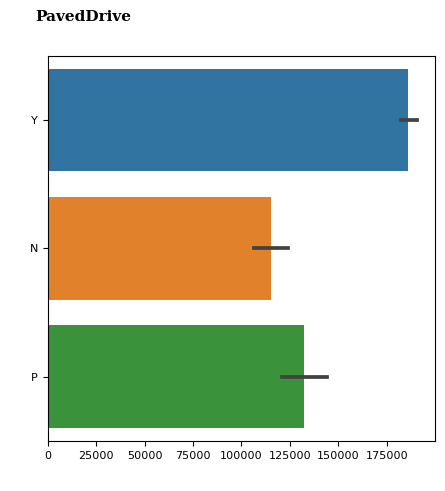

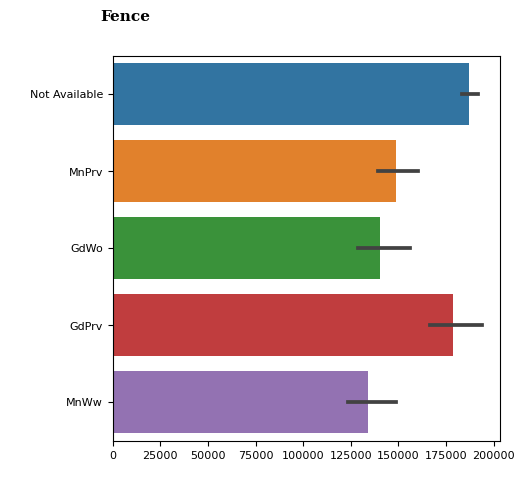

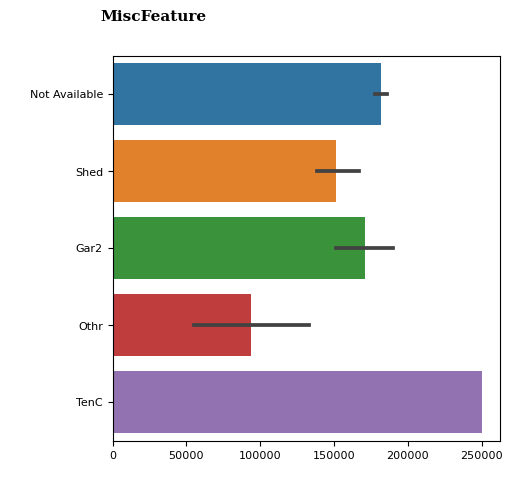

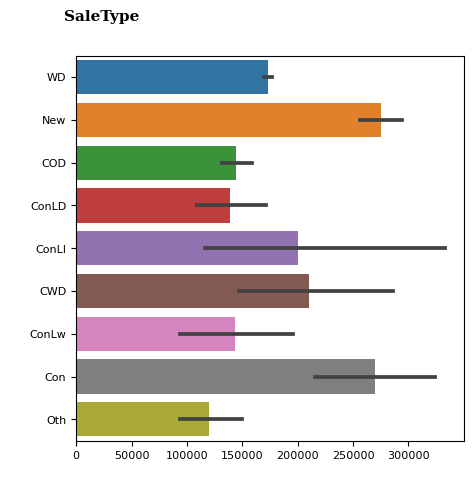

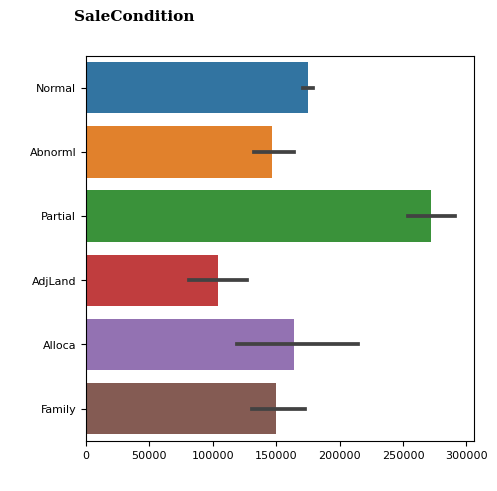

In [40]:
for i in categorical_columns:
  fig, ax = plt.subplots(1,1, figsize=(5, 5))
  ax = sns.barplot(y = data[i][1:],x = data['SalePrice'],data=data.iloc[1:])
  fig.text(0.1, 0.95, i, fontsize=11, fontweight='bold', fontfamily='serif')
  plt.xlabel(' ', fontsize=12)
  plt.ylabel(' ')
  plt.yticks(fontsize=8)
  plt.xticks(fontsize=8)
  plt.box(True)
  plt.show()

#### Insights:
- LotShape:Slightly irregular LotShape have the highest SalePrice
- Utilities: Most of the houses in the data set have all the public utilities
- LandSlope:Houses at severe land slope have lowest Saleprice
- HouseStyle: 2 Storied houses have the highest SalePrice
- ExterQual:Houses with excellent quality of material on the exterior have the highest SalePrice
- ExterCond:Houses with excellent condition of material on the exterior have the highest SalePrice

- Houses with excellent heating quality and kitchen quality have the highest SalePrice
- SalePrice range in largest for houses with average fireplace quality
- Houses with typical functionality have highest SalePrice. 
- There are very few houses that are severely damaged

- SalePrice is highest where garage is finished.
- The range of SalePrice is widest for Typical/Average Garage Quality and condition
- There are very few houses with excellent condition of garages

- Houses with Excellent quality basement have the highest SalePrice
- Housing with good living quarters have the highest SalePrice
- A lot of houses have unfinished or no basement

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in  predicting SalePricee.

- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

- Houses with attached and built-in garage have high SalePrice

- Most of the houses do not have fence (Fence= Not Available)



- Most of the houses are newly built, houses with warranty deed have high SalePrice
- Sale condition = Normal leads to high SalePrice

#### Encoding Categorical Feature

In [41]:
data['LotShape'] = data['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
data['Utilities'] = data['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
data['LandSlope'] = data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
data['HouseStyle'] = data['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
data['ExterQual'] = data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['ExterCond'] = data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['BsmtQual'] = data['BsmtQual'].map({'Not Available':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtCond'] = data['BsmtCond'].map({'Not Available':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtExposure'] = data['BsmtExposure'].map({'Not Available':0,'No':1,'Mn':2,'Av':3,'Gd':4})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'Not Available':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['BsmtFinType2'] = data['BsmtFinType2'].map({'Not Available':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['HeatingQC'] = data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['CentralAir'] = data['CentralAir'].map({'N':0,'Y':1})
data['KitchenQual'] = data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
data['GarageFinish'] = data['GarageFinish'].map({'Not Available':0,'Unf':1,'RFn':2,'Fin':3})
data['GarageQual'] = data['GarageQual'].map({'Not Available':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['GarageCond'] = data['GarageCond'].map({'Not Available':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['Functional'] = data['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
data['FireplaceQu'] = data['FireplaceQu'].map({'Not Available':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [42]:
# Checking the features after encoding

data[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'HeatingQC','CentralAir','KitchenQual','GarageFinish','GarageQual','GarageCond','Functional','FireplaceQu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  CentralAir    1451 non-null   int64
 13  KitchenQual   1451 non-null   int64
 14  GarageFinish  1451 non-null   int64
 15  GarageQual    1451 non-null   int64
 16  GarageCond    1451 non-null   int64
 17  Functional    1451 non-null   int64
 18  FireplaceQu   1451 non-null   int64
dtypes: int64(19)
memory usage: 

In [43]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

In [44]:
dummy_df = pd.get_dummies(data[unordered_features], drop_first=True)

In [45]:
dummy_df.shape

(1451, 144)

#### Insights:
- Adding 144 features to the existing dataset will make the model very complex.
- From the above barplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [46]:
dummies_to_drop = []
for feature in dummy_df.columns:
    if dummy_df[feature].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feature)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [47]:
# Dropping the highly imbalanced dummy variables
dummy_df = dummy_df.drop(dummies_to_drop, axis=1)
print(dummy_df.shape)

(1451, 52)


In [48]:
data.shape

(1451, 68)

In [49]:
# Adding the dummy variables to the original dataframe
data = pd.concat([data,dummy_df],axis=1)

# Dropping the redundant columns
data = data.drop(unordered_features,axis=1)

In [50]:
data.shape

(1451, 97)

### 3. Model Building and Evaluation

#### Splitting into Train and Test Data

In [51]:
X = data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not Available,PavedDrive_Y,Fence_MnPrv,Fence_Not Available,MiscFeature_Not Available,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,2003,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,1976,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,2001,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,1915,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,2000,...,0,0,1,0,1,1,0,1,1,0


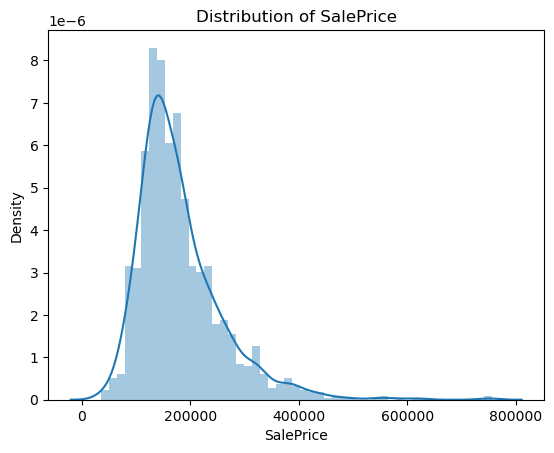

In [52]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(data['SalePrice'])
plt.show()

#### Insights:
- Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.

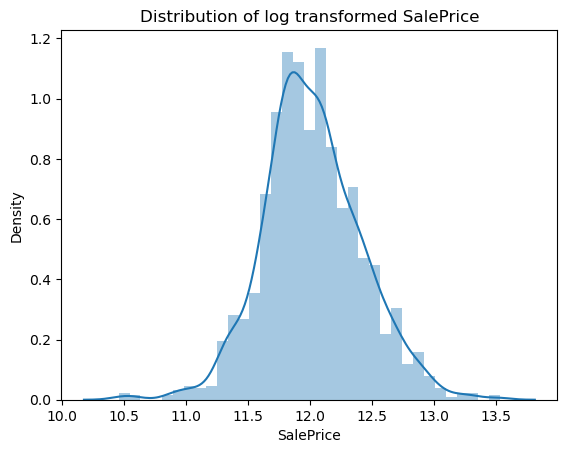

In [53]:
sns.distplot(np.log(data['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [54]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building
y = np.log(data['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [55]:
# Splitting data into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 96)
(291, 96)
(1160,)
(291,)


In [57]:
X['LotFrontage'].isnull().any()

True

In [58]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.
si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [59]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [60]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

### Feature Scaling

In [61]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [62]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [63]:
# Checking the features after Scaling

print(X_tr_scaled.head()) # train data
print(X_te_scaled.head()) # test data

   MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0   -0.137941    -0.840191 -0.892882  0.747271   0.029374  -0.225421   
1    2.389253    -2.335542 -1.956426  0.747271   0.029374  -0.225421   
2   -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   
3   -0.936002     0.000000 -0.396469 -1.386037   0.029374  -0.225421   
4   -0.936002     0.062662 -0.450481  0.747271   0.029374  -0.225421   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0    0.179294    -0.787347     2.015381  -2.859644  ...          -0.605238   
1    0.690305     0.689327    -0.563311   1.112036  ...           1.652242   
2   -0.842727    -0.787347    -0.563311  -0.389860  ...          -0.605238   
3   -0.842727    -1.525684    -1.594788   0.010646  ...          -0.605238   
4   -0.842727    -0.787347     0.468166  -0.356484  ...           1.652242   

   GarageType_Not Available  PavedDrive_Y  Fence_MnPrv  Fence_Not Available  \
0                  

### Building Linear Regression with all features

In [64]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_tr_scaled, y_train)

LinearRegression()

In [65]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[-1.33113657e-02  1.29097716e-02  2.09159353e-02 -2.56307122e-03
  6.51990913e-03  6.70287568e-03  7.27316510e-03  7.44250548e-02
  5.02089473e-02  4.98683049e-02  2.14555430e-03 -4.78868772e-04
  7.77166783e-03 -5.70079216e-03  1.07456589e-02  6.66555692e-03
  6.69245470e-03 -7.23213195e-04  3.77780609e-02  5.93823059e-03
  1.09169138e+12  7.79960882e-03  1.06379863e-02  8.39327437e-03
  1.21167111e-01  1.02988470e-01  2.23215136e-02  1.17629627e+11
  9.40952944e-03  8.07243668e-03 -8.41969084e-03  5.79687514e-03
  1.45734004e-02 -2.74143173e-02  1.85191531e-02  1.14925234e-03
  9.69876358e-03  1.82149037e-02  2.14903120e-02 -2.00137269e-02
  3.35507968e-03  7.55189782e-03 -7.22791488e-03 -8.33518024e-03
  3.91939391e-02  1.29170164e-02  7.54978735e-03 -5.94690446e-03
 -1.35513702e-03  6.85739992e-03 -4.84720854e-03 -6.69842833e-03
 -2.26704527e-02  3.83693390e-04 -1.27765948e-02 -6.50825672e-03
  8.37344005e-03 -7.08638003e-03 -9.25414884e-03  2.54796029e-02
  1.04613078e-02  2.45957

In [66]:
X_train_lm = sm.add_constant(X_tr_scaled)

In [67]:
lr = sm.OLS(y_train.values.reshape(-1,1), X_train_lm).fit()

In [68]:
lr.params

const                        12.014837
MSSubClass                   -0.013311
LotFrontage                   0.008974
LotArea                       0.028993
LotShape                     -0.000870
                               ...    
MiscFeature_Not Available     0.004351
SaleType_New                 -0.003410
SaleType_WD                  -0.004399
SaleCondition_Normal          0.029499
SaleCondition_Partial         0.033743
Length: 97, dtype: float64

In [69]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     129.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:33:49   Log-Likelihood:                 904.28
No. Observations:                1160   AIC:                            -1619.
Df Residuals:                    1065   BIC:                            -1138.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        12.0148      0.003   3533.340      0.000      12.008      12.022
MSSubClass                   -0.0133      0.007     -1.867      0.062      -0.027       0.001
LotFrontage                   0.0090      0.005      1.760      0.079      -0.001       0.019
LotArea                       0.0290      0.006      5.052      0.000       0.018       0.040
LotShape                     -0.0009      0.004     -0.212      0.832      -0.009       0.007
Utilities                     0.0051      0.004      1.394      0.164      -0.002       0.012
LandSlope                     0.0094      0.004      2.112      0.035       0.001       0.018
HouseStyle                    0.0085      0.006      1.446      0.149      -0.003       0.020
OverallQual                   0.0750      0.007     10.963      0.000       0.062       0.088
OverallCond                   0.0504      0.005     10.334      0.000       0.041       0.060
YearBuilt                     0.0411      0.010      4.254      0.000       0.022       0.060
YearRemodAdd                  0.0052      0.006      0.877      0.381      -0.006       0.017
MasVnrArea                   -0.0004      0.006     -0.054      0.957      -0.013       0.012
ExterQual                     0.0057      0.006      0.907      0.364      -0.007       0.018
ExterCond                    -0.0056      0.004     -1.420      0.156      -0.013       0.002
BsmtQual                      0.0103      0.008      1.341      0.180      -0.005       0.025
BsmtCond                      0.0028      0.006      0.466      0.641      -0.009       0.014
BsmtExposure                  0.0064      0.005      1.342      0.180      -0.003       0.016
BsmtFinType1                  0.0010      0.006      0.169      0.866      -0.010       0.012
BsmtFinSF1                    0.0376      0.010      3.880      0.000       0.019       0.057
BsmtFinType2                  0.0057      0.005      1.262      0.207      -0.003       0.015
BsmtFinSF2                 1.125e-17   3.18e-17      0.354      0.724   -5.12e-17    7.37e-17
BsmtUnfSF                     0.0113      0.009      1.308      0.191      -0.006       0.028
HeatingQC                     0.0113      0.005      2.294      0.022       0.002       0.021
CentralAir                    0.0119      0.005      2.576      0.010       0.003       0.021
1stFlrSF                      0.1161      0.009     12.842      0.000       0.098       0.134
2ndFlrSF                      0.1010      0.009     11.182      0.000       0.083       0.119
BsmtFullBath                  0.0197      0.005      3.862      0.000       0.010       0.030
BsmtHalfBath              -5.649e-17    5.6e-17     -1.008      0.314   -1.66e-16    5.34e-17
FullBath                      0.0103      0.006      1.656      0.098      

This model has an Adjusted R-squared value of 91.3% which seems pretty good. Lets, predict on test data.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [70]:
y_train_pred = lm.predict(X_tr_scaled)

Text(0.5, 0, 'Errors')

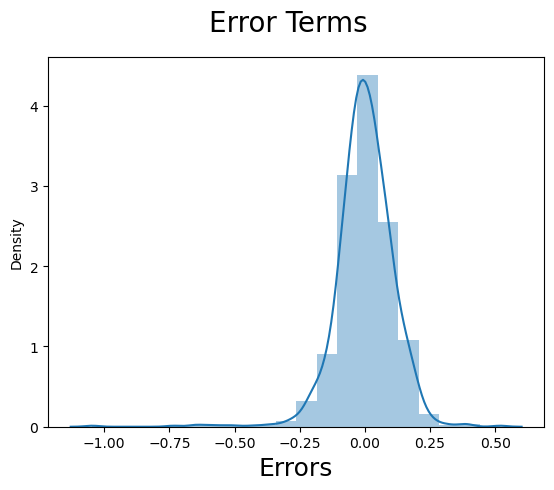

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)    

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

In [72]:
# Add a constant to the test set created
X_test_new = sm.add_constant(X_te_scaled)

In [73]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

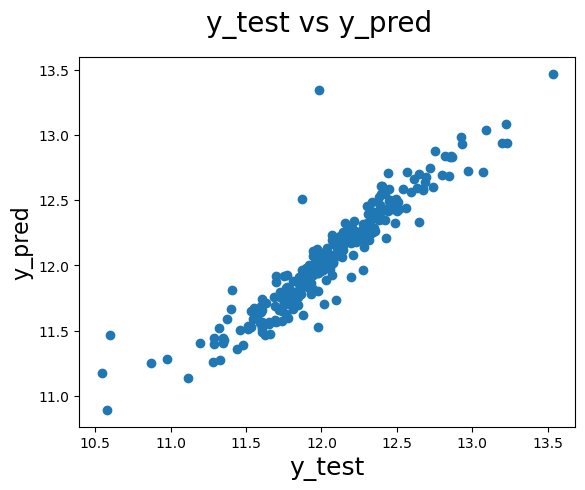

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared for the test set.

In [75]:
# r2_score 
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8652248154748224

Thus, for the model with all variables, the r-squared on training and test data is about 92.0% and 86.5% respectively.

In [76]:
# Model Evaluation
print("Linear Regression without Ridge and Lasso with all features")
print("===========================================================")
print('R2 score (train) : ',r2_score(y_train,y_train_pred))
print('R2 score (test) : ',r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))


Linear Regression without Ridge and Lasso with all features
R2 score (train) :  0.9171803939464649
R2 score (test) :  0.8652248154748224
RMSE (train) :  0.1127008781431813
RMSE (test) :  0.15695577131958274


### Ridge Regression

In [77]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
ridge = Ridge()
folds = 5
model_ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_ridge_cv.fit(X_tr_scaled, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
#checking the value of optimum number of parameters
print(model_ridge_cv.best_params_)
print(model_ridge_cv.best_score_)

{'alpha': 20}
-0.0875401500060182


In [79]:
cv_results_ridge = pd.DataFrame(model_ridge_cv.cv_results_)
cv_results_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009383,0.007662,0.002031,0.004062,0.0001,{'alpha': 0.0001},-0.082132,-0.089811,-0.085554,-0.092843,...,-0.088249,0.003880,24,-0.077493,-0.075177,-0.077045,-0.074701,-0.076461,-0.076176,0.001072
1,0.004897,0.001930,0.003928,0.002367,0.001,{'alpha': 0.001},-0.082132,-0.089811,-0.085554,-0.092843,...,-0.088249,0.003880,23,-0.077493,-0.075177,-0.077045,-0.074701,-0.076461,-0.076176,0.001072
2,0.009374,0.007654,0.003124,0.006249,0.01,{'alpha': 0.01},-0.082131,-0.089808,-0.085552,-0.092843,...,-0.088248,0.003881,22,-0.077493,-0.075178,-0.077045,-0.074701,-0.076461,-0.076176,0.001072
3,0.006254,0.007659,0.003123,0.006247,0.1,{'alpha': 0.1},-0.082122,-0.089787,-0.085538,-0.092842,...,-0.088239,0.003883,21,-0.077494,-0.075180,-0.077048,-0.074700,-0.076460,-0.076176,0.001072
4,0.006250,0.007654,0.003127,0.006255,0.2,{'alpha': 0.2},-0.082113,-0.089763,-0.085523,-0.092842,...,-0.088229,0.003886,20,-0.077494,-0.075183,-0.077050,-0.074699,-0.076460,-0.076177,0.001073
5,0.009367,0.007648,0.028127,0.048817,0.3,{'alpha': 0.3},-0.082103,-0.089739,-0.085508,-0.092841,...,-0.088219,0.003889,19,-0.077495,-0.075185,-0.077052,-0.074697,-0.076459,-0.076178,0.001073
6,0.006254,0.007659,0.003120,0.006241,0.4,{'alpha': 0.4},-0.082094,-0.089716,-0.085493,-0.092840,...,-0.088209,0.003892,18,-0.077495,-0.075188,-0.077055,-0.074696,-0.076458,-0.076178,0.001073
7,0.009375,0.007655,0.000000,0.000000,0.5,{'alpha': 0.5},-0.082086,-0.089692,-0.085479,-0.092839,...,-0.088199,0.003894,17,-0.077496,-0.075191,-0.077057,-0.074695,-0.076458,-0.076179,0.001074
8,0.006246,0.007650,0.003128,0.006255,0.6,{'alpha': 0.6},-0.082077,-0.089670,-0.085465,-0.092838,...,-0.088190,0.003897,16,-0.077497,-0.075194,-0.077059,-0.074693,-0.076457,-0.076180,0.001074
9,0.006250,0.007655,0.006245,0.007648,0.7,{'alpha': 0.7},-0.082069,-0.089647,-0.085452,-0.092837,...,-0.088181,0.003899,15,-0.077497,-0.075197,-0.077061,-0.074692,-0.076456,-0.076181,0.001074


In [80]:
# Prediction on Train and Test Data
y_train_pred = model_ridge_cv.predict(X_tr_scaled)
y_test_pred = model_ridge_cv.predict(X_te_scaled)

In [81]:
# Model Evaluation
print("Ridge Regression with ",model_ridge_cv.best_params_)
print("===================================")
print('R2 score (train) : ',r2_score(y_train,y_train_pred))
print('R2 score (test) : ',r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))


Ridge Regression with  {'alpha': 20}
R2 score (train) :  0.9192373644156561
R2 score (test) :  0.8737208706744778
RMSE (train) :  0.11129251618564416
RMSE (test) :  0.15192810165635728


With Ridge Regression, the optimal value of alpha is 20 and for the model with all variables, the r-squared on training and test data is about 91.9% and 87.37% respectively. R2 Score for Test Data is slightly more than Linear Regression.

### Lasso Regression

In [82]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
lasso = Lasso()
folds = 5
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_tr_scaled, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
#checking the value of optimum number of parameters
print(model_lasso_cv.best_params_)
print(model_lasso_cv.best_score_)

{'alpha': 0.001}
-0.08619176022435568


In [84]:
cv_results_lasso = pd.DataFrame(model_lasso_cv.cv_results_)
cv_results_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033001,0.019539,0.000815,0.001169,0.0001,{'alpha': 0.0001},-0.081813,-0.089179,-0.084829,-0.092678,...,-0.087858,0.003982,2,-0.077408,-0.075214,-0.077112,-0.074554,-0.076393,-0.076136,0.001095
1,0.012500,0.006250,0.003125,0.006250,0.001,{'alpha': 0.001},-0.081265,-0.086233,-0.081817,-0.092216,...,-0.086192,0.004247,1,-0.077896,-0.076393,-0.077489,-0.075267,-0.076486,-0.076706,0.000921
2,0.009373,0.007653,0.003129,0.006258,0.01,{'alpha': 0.01},-0.078558,-0.091433,-0.084013,-0.102357,...,-0.088827,0.007995,3,-0.085097,-0.083781,-0.084285,-0.082558,-0.083569,-0.083858,0.000836
3,0.012495,0.006247,0.000000,0.000000,0.1,{'alpha': 0.1},-0.152795,-0.180784,-0.176956,-0.173859,...,-0.167391,0.012212,4,-0.167865,-0.163263,-0.167574,-0.165881,-0.167468,-0.166410,0.001719
4,0.009375,0.007655,0.003125,0.006250,0.2,{'alpha': 0.2},-0.224645,-0.249398,-0.239426,-0.233503,...,-0.232937,0.011080,5,-0.232270,-0.232802,-0.233267,-0.231826,-0.233777,-0.232788,0.000693
5,0.003125,0.006250,0.003123,0.006247,0.3,{'alpha': 0.3},-0.287107,-0.315541,-0.300545,-0.291070,...,-0.294392,0.012868,6,-0.292870,-0.295645,-0.295576,-0.292707,-0.294241,-0.294208,0.001263
6,0.006250,0.007654,0.003125,0.006249,0.4,{'alpha': 0.4},-0.302606,-0.323324,-0.310362,-0.304427,...,-0.306782,0.009941,7,-0.307505,-0.303006,-0.305611,-0.307140,-0.310118,-0.306676,0.002339
7,0.006251,0.007656,0.000000,0.000000,0.5,{'alpha': 0.5},-0.302606,-0.323324,-0.310362,-0.304427,...,-0.306782,0.009941,7,-0.307505,-0.303006,-0.305611,-0.307140,-0.310118,-0.306676,0.002339
8,0.003125,0.006250,0.003124,0.006249,0.6,{'alpha': 0.6},-0.302606,-0.323324,-0.310362,-0.304427,...,-0.306782,0.009941,7,-0.307505,-0.303006,-0.305611,-0.307140,-0.310118,-0.306676,0.002339
9,0.009382,0.007661,0.006241,0.007644,0.7,{'alpha': 0.7},-0.302606,-0.323324,-0.310362,-0.304427,...,-0.306782,0.009941,7,-0.307505,-0.303006,-0.305611,-0.307140,-0.310118,-0.306676,0.002339


In [85]:
# Prediction on Train and Test Data
y_train_pred = model_lasso_cv.predict(X_tr_scaled)
y_test_pred = model_lasso_cv.predict(X_te_scaled)

In [86]:
# Model Evaluation
print("Lasso Regression with ",model_lasso_cv.best_params_)
print("===================================")
print('R2 score (train) : ',r2_score(y_train,y_train_pred))
print('R2 score (test) : ',r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Lasso Regression with  {'alpha': 0.001}
R2 score (train) :  0.9179125447640548
R2 score (test) :  0.8752467036915913
RMSE (train) :  0.1122016170566611
RMSE (test) :  0.15100743709430983


With Lasso Regression, the optimal value of alpha is 0.001 and for the model with all variables, the r-squared on training and test data is about 91.79% and 87.52% respectively. R2 Score for Test Data is slightly more than Ridge Regression.

### Comparing Model Coefficients

In [87]:
model_coefficients = pd.DataFrame(index=X_te_scaled.columns)
model_coefficients.rows = X_te_scaled.columns

model_coefficients['Ridge (alpha=20.0)'] = model_ridge_cv.best_estimator_.coef_
model_coefficients['Lasso (alpha=0.001)'] = model_lasso_cv.best_estimator_.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.001)
MSSubClass,-0.010761,-0.003345
LotFrontage,0.009910,0.007723
LotArea,0.029913,0.030348
LotShape,-0.000970,-0.000328
Utilities,0.005316,0.003445
LandSlope,0.009633,0.008385
HouseStyle,0.007380,0.000294
OverallQual,0.074308,0.077625
OverallCond,0.048556,0.049253
YearBuilt,0.034802,0.036726


In [88]:
# Converting the predictions to its original scale (anti log)
y_test_pred = np.round(np.exp(y_test_pred)).astype(int)

In [89]:
y_test_pred

array([292736, 219158, 130815, 114666, 148691, 112769, 207776, 216334,
       236491,  97353,  69822, 157047, 141936, 195995, 194368, 154707,
       288378, 204506, 349950, 194072, 105543, 255170, 388410, 134923,
       294146, 125574, 294114, 201115, 185320,  71054, 215088, 152690,
       218808, 173045, 174281, 157940, 398007, 205973, 133728, 149507,
       126396, 293556, 425520, 139227, 167268, 172980, 178968,  96168,
       388484, 150048, 225799, 189290, 224526, 116140, 199666, 176380,
       300790, 196228, 161289, 190775, 165997, 130658, 178453, 137469,
        95173, 249668, 149720, 243928,  97871, 111777, 201103, 158049,
       143828, 139815, 207115, 236402, 701813,  51830, 229210,  99288,
       221025, 195591, 211873, 204327, 120388, 101285,  94902, 160547,
       294683, 468924, 174503, 212436, 187901, 213961,  85807, 162612,
       226706, 335861, 131957,  93890, 177953, 143760, 249755, 621973,
       229573, 132637, 162964, 278090, 248237, 160990, 259234, 124527,
      

### Final Model

Lasso Regression produced slightly R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [90]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
1stFlrSF,0.118019
2ndFlrSF,0.097601
OverallQual,0.077625
OverallCond,0.049253
YearBuilt,0.036726
SaleCondition_Partial,0.032169
BsmtFinSF1,0.030554
LotArea,0.030348
SaleCondition_Normal,0.027691
MSZoning_RL,0.025361


#### Top 5 predictor variable for Lasso Regression:

In [91]:
print("*******Top 5 Predictor variables for Lasso Regression*******")
print("============================================================")
model_coefficients['Lasso (alpha=0.001)'].sort_values(ascending=False).head(5)

*******Top 5 Predictor variables for Lasso Regression*******


1stFlrSF       0.118019
2ndFlrSF       0.097601
OverallQual    0.077625
OverallCond    0.049253
YearBuilt      0.036726
Name: Lasso (alpha=0.001), dtype: float64

#### Top 5 predictor variable for Ridge Regression:

In [92]:
print("*******Top 5 Predictor variables for Ridge Regression*******")
print("============================================================")
model_coefficients['Ridge (alpha=20.0)'].sort_values(ascending=False).head(5)

*******Top 5 Predictor variables for Ridge Regression*******


1stFlrSF       0.103519
2ndFlrSF       0.086532
OverallQual    0.074308
OverallCond    0.048556
BsmtFinSF1     0.038236
Name: Ridge (alpha=20.0), dtype: float64

#### Summary:

Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.Optimum alpha = 20.0 for ridge and 0.001 for lasso model.Model evaluation is done with R2 score and Root Mean Square Error. Lasso Regression is chosen as final model for having slightly better R-square value on test data.

### Subjective Questions Code

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

 

 


In [93]:
# Model Building
ridge_model = Ridge(alpha=40.0)
ridge_model.fit(X_tr_scaled, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_tr_scaled)
y_test_pred = ridge_model.predict(X_te_scaled)

print("Model Evaluation : Ridge Regression, alpha=40.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Ridge Regression, alpha=40.0
R2 score (train) :  0.9184
R2 score (test) :  0.8748
RMSE (train) :  0.1119
RMSE (test) :  0.1513


In [94]:
# Model Building
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_tr_scaled, y_train)

# Predicting
y_train_pred = lasso_model.predict(X_tr_scaled)
y_test_pred = lasso_model.predict(X_te_scaled)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9161
R2 score (test) :  0.8764
RMSE (train) :  0.1135
RMSE (test) :  0.1503


In [95]:
model_coefficients['Ridge (alpha = 40.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=20.0),Lasso (alpha=0.001),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
MSSubClass,-0.010761,-0.003345,-0.008943,-0.000000
LotFrontage,0.009910,0.007723,0.010623,0.006161
LotArea,0.029913,0.030348,0.030317,0.030566
LotShape,-0.000970,-0.000328,-0.001141,-0.000030
Utilities,0.005316,0.003445,0.005390,0.002487
LandSlope,0.009633,0.008385,0.009608,0.008570
HouseStyle,0.007380,0.000294,0.006441,-0.000000
OverallQual,0.074308,0.077625,0.073065,0.080500
OverallCond,0.048556,0.049253,0.046815,0.047220
YearBuilt,0.034802,0.036726,0.030542,0.033438


In [96]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(5)

,Ridge (alpha=20.0),Lasso (alpha=0.001),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
1stFlrSF,0.103519,0.118019,0.094770,0.118123
2ndFlrSF,0.086532,0.097601,0.076570,0.093733
OverallQual,0.074308,0.077625,0.073065,0.080500
OverallCond,0.048556,0.049253,0.046815,0.047220
YearBuilt,0.034802,0.036726,0.030542,0.033438


In [97]:
model_coefficients.sort_values(by='Ridge (alpha = 40.0)', ascending=False).head(5)

,Ridge (alpha=20.0),Lasso (alpha=0.001),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
1stFlrSF,0.103519,0.118019,0.094770,0.118123
2ndFlrSF,0.086532,0.097601,0.076570,0.093733
OverallQual,0.074308,0.077625,0.073065,0.080500
OverallCond,0.048556,0.049253,0.046815,0.047220
BsmtFinSF1,0.038236,0.030554,0.037955,0.028343


Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [98]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

,Ridge (alpha=20.0),Lasso (alpha=0.001),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
1stFlrSF,0.103519,0.118019,0.094770,0.118123
2ndFlrSF,0.086532,0.097601,0.076570,0.093733
OverallQual,0.074308,0.077625,0.073065,0.080500
OverallCond,0.048556,0.049253,0.046815,0.047220
YearBuilt,0.034802,0.036726,0.030542,0.033438


In [99]:
X_train_new = X_tr_scaled.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'YearBuilt'], axis=1)

In [100]:
X_test_new = X_te_scaled.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'YearBuilt'], axis=1)

In [101]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [102]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
BsmtFinSF1,0.084768
TotRmsAbvGrd,0.060903
BsmtUnfSF,0.050666
FullBath,0.041572
LotArea,0.038676
